In [79]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler

def encode(data):
    encoded = to_categorical(data)
    return encoded

In [80]:
ColumnNames = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
types = {1:"buildingwindowsfloatprocessed", 2:"buildingwindowsnonfloatprocessed", 3:"vehiclewindowsfloatprocessed", 4:"vehiclewindowsnonfloatprocessed", 5:"containers", 6:"tableware", 7:"headlamps"}
types

{1: 'buildingwindowsfloatprocessed',
 2: 'buildingwindowsnonfloatprocessed',
 3: 'vehiclewindowsfloatprocessed',
 4: 'vehiclewindowsnonfloatprocessed',
 5: 'containers',
 6: 'tableware',
 7: 'headlamps'}

In [81]:
dataset = pd.read_csv('glass.csv',names = ColumnNames, header = 0)
dataset = dataset.sample(frac=1)
dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


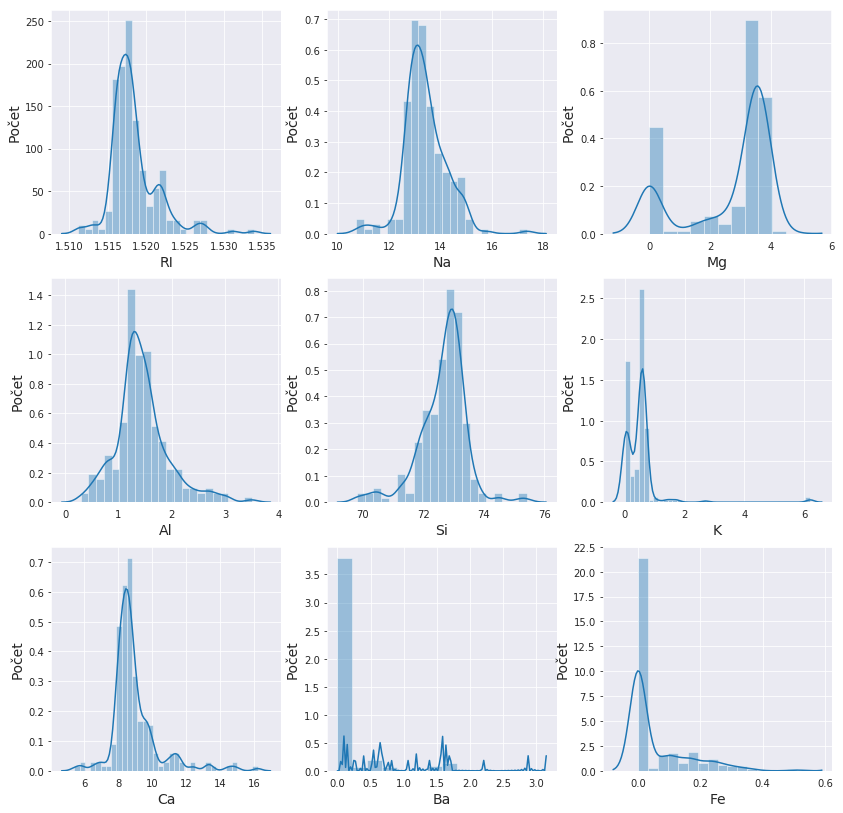

In [82]:
df = dataset.drop("Type", axis=1)
y = dataset["Type"]

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 42)

f, axes = plt.subplots(3,3,figsize=(14,14))
sns.set_style('darkgrid')
sns.distplot(dataset['RI'], ax = axes[0,0])
axes[0,0].set_xlabel('RI', fontsize=14)
axes[0,0].set_ylabel('Počet', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.distplot(dataset['Na'], ax = axes[0,1])
axes[0,1].set_xlabel('Na', fontsize=14)
axes[0,1].set_ylabel('Počet', fontsize=14)
axes[0,1].yaxis.tick_left()

sns.distplot(dataset['Mg'], ax = axes[0,2])
axes[0,2].set_xlabel('Mg', fontsize=14)
axes[0,2].set_ylabel('Počet', fontsize=14)
axes[0,2].yaxis.tick_left()

sns.distplot(dataset['Al'], ax = axes[1,0])
axes[1,0].set_xlabel('Al', fontsize=14)
axes[1,0].set_ylabel('Počet', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.distplot(dataset['Si'], ax = axes[1,1])
axes[1,1].set_xlabel('Si', fontsize=14)
axes[1,1].set_ylabel('Počet', fontsize=14)
axes[1,1].yaxis.tick_left()

sns.distplot(dataset['K'], ax = axes[1,2])
axes[1,2].set_xlabel('K', fontsize=14)
axes[1,2].set_ylabel('Počet', fontsize=14)
axes[1,2].yaxis.tick_left()

sns.distplot(dataset['Ca'], ax = axes[2,0])
axes[2,0].set_xlabel('Ca', fontsize=14)
axes[2,0].set_ylabel('Počet', fontsize=14)
axes[2,0].yaxis.tick_left()

sns.distplot(dataset['Ba'], ax = axes[2,1])
axes[2,1].set_xlabel('Ba', fontsize=14)
axes[2,1].set_ylabel('Počet', fontsize=14)
axes[2,1].yaxis.tick_left()

sns.distplot(dataset['Fe'], ax = axes[2,2])
axes[2,2].set_xlabel('Fe', fontsize=14)
axes[2,2].set_ylabel('Počet', fontsize=14)
axes[2,2].yaxis.tick_left()

plt.show()

In [83]:
print("Rozmery X_train: ",X_train.shape)
print("Rozmery X_test: ", X_test.shape)
print("Rozmery y_train: ",y_train.shape)
print("Rozmery y_test",y_test.shape)

Rozmery X_train:  (160, 9)
Rozmery X_test:  (54, 9)
Rozmery y_train:  (160,)
Rozmery y_test (54,)


In [84]:
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)

y_train_encoded = encode(y_train)
y_test_encoded = encode(y_test)
y_train_encoded = np.delete(y_train_encoded, [0,4], axis = 1)
y_test_encoded = np.delete(y_test_encoded, [0,4], axis = 1)

In [89]:
model = Sequential()
model.add(Dense(9, input_dim=9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded), batch_size = 100, epochs = 1000)
scores = model.evaluate(X_test_scaled, y_test_encoded)
scoresTrain = model.evaluate(X_train_scaled, y_train_encoded)

Train on 160 samples, validate on 54 samples
Epoch 1/1000
160/160 [==============================] - 1s 8ms/step - loss: 0.1411 - accuracy: 0.3562 - val_loss: 0.1359 - val_accuracy: 0.2963
Epoch 2/1000
160/160 [==============================] - 0s 146us/step - loss: 0.1406 - accuracy: 0.3562 - val_loss: 0.1354 - val_accuracy: 0.2963
Epoch 3/1000
160/160 [==============================] - 0s 342us/step - loss: 0.1401 - accuracy: 0.3562 - val_loss: 0.1348 - val_accuracy: 0.2963
Epoch 4/1000
160/160 [==============================] - 0s 100us/step - loss: 0.1395 - accuracy: 0.3562 - val_loss: 0.1343 - val_accuracy: 0.2963
Epoch 5/1000
160/160 [==============================] - 0s 124us/step - loss: 0.1390 - accuracy: 0.3562 - val_loss: 0.1337 - val_accuracy: 0.3148
Epoch 6/1000
160/160 [==============================] - 0s 135us/step - loss: 0.1384 - accuracy: 0.3562 - val_loss: 0.1332 - val_accuracy: 0.3333
Epoch 7/1000
160/160 [==============================] - 0s 138us/step - loss: 0.1

160/160 [==============================] - 0s 190us/step - loss: 0.1141 - accuracy: 0.3812 - val_loss: 0.1093 - val_accuracy: 0.4444
Epoch 57/1000
160/160 [==============================] - 0s 217us/step - loss: 0.1137 - accuracy: 0.3938 - val_loss: 0.1088 - val_accuracy: 0.4815
Epoch 58/1000
160/160 [==============================] - 0s 200us/step - loss: 0.1133 - accuracy: 0.4125 - val_loss: 0.1084 - val_accuracy: 0.5000
Epoch 59/1000
160/160 [==============================] - 0s 354us/step - loss: 0.1129 - accuracy: 0.4125 - val_loss: 0.1079 - val_accuracy: 0.5000
Epoch 60/1000
160/160 [==============================] - 0s 138us/step - loss: 0.1126 - accuracy: 0.4125 - val_loss: 0.1075 - val_accuracy: 0.5000
Epoch 61/1000
160/160 [==============================] - 0s 121us/step - loss: 0.1122 - accuracy: 0.4375 - val_loss: 0.1071 - val_accuracy: 0.5000
Epoch 62/1000
160/160 [==============================] - 0s 207us/step - loss: 0.1118 - accuracy: 0.4500 - val_loss: 0.1066 - val_ac

160/160 [==============================] - 0s 131us/step - loss: 0.0928 - accuracy: 0.5750 - val_loss: 0.0895 - val_accuracy: 0.5926
Epoch 112/1000
160/160 [==============================] - 0s 217us/step - loss: 0.0925 - accuracy: 0.5813 - val_loss: 0.0894 - val_accuracy: 0.5926
Epoch 113/1000
160/160 [==============================] - 0s 157us/step - loss: 0.0922 - accuracy: 0.5875 - val_loss: 0.0892 - val_accuracy: 0.5926
Epoch 114/1000
160/160 [==============================] - 0s 89us/step - loss: 0.0919 - accuracy: 0.5938 - val_loss: 0.0890 - val_accuracy: 0.5926
Epoch 115/1000
160/160 [==============================] - 0s 357us/step - loss: 0.0916 - accuracy: 0.6000 - val_loss: 0.0888 - val_accuracy: 0.5926
Epoch 116/1000
160/160 [==============================] - 0s 209us/step - loss: 0.0913 - accuracy: 0.6000 - val_loss: 0.0885 - val_accuracy: 0.6111
Epoch 117/1000
160/160 [==============================] - 0s 170us/step - loss: 0.0910 - accuracy: 0.6000 - val_loss: 0.0884 - v

Epoch 166/1000
160/160 [==============================] - 0s 146us/step - loss: 0.0807 - accuracy: 0.6562 - val_loss: 0.0855 - val_accuracy: 0.5926
Epoch 167/1000
160/160 [==============================] - 0s 109us/step - loss: 0.0805 - accuracy: 0.6562 - val_loss: 0.0853 - val_accuracy: 0.5926
Epoch 168/1000
160/160 [==============================] - 0s 131us/step - loss: 0.0804 - accuracy: 0.6562 - val_loss: 0.0853 - val_accuracy: 0.5926
Epoch 169/1000
160/160 [==============================] - 0s 125us/step - loss: 0.0802 - accuracy: 0.6562 - val_loss: 0.0852 - val_accuracy: 0.5926
Epoch 170/1000
160/160 [==============================] - 0s 157us/step - loss: 0.0801 - accuracy: 0.6562 - val_loss: 0.0851 - val_accuracy: 0.5926
Epoch 171/1000
160/160 [==============================] - 0s 151us/step - loss: 0.0800 - accuracy: 0.6562 - val_loss: 0.0850 - val_accuracy: 0.6111
Epoch 172/1000
160/160 [==============================] - 0s 128us/step - loss: 0.0798 - accuracy: 0.6625 - val_

160/160 [==============================] - 0s 153us/step - loss: 0.0742 - accuracy: 0.6687 - val_loss: 0.0828 - val_accuracy: 0.6296
Epoch 222/1000
160/160 [==============================] - 0s 195us/step - loss: 0.0741 - accuracy: 0.6687 - val_loss: 0.0828 - val_accuracy: 0.6296
Epoch 223/1000
160/160 [==============================] - 0s 112us/step - loss: 0.0739 - accuracy: 0.6687 - val_loss: 0.0828 - val_accuracy: 0.6296
Epoch 224/1000
160/160 [==============================] - 0s 184us/step - loss: 0.0738 - accuracy: 0.6687 - val_loss: 0.0827 - val_accuracy: 0.6296
Epoch 225/1000
160/160 [==============================] - 0s 371us/step - loss: 0.0738 - accuracy: 0.6687 - val_loss: 0.0827 - val_accuracy: 0.6296
Epoch 226/1000
160/160 [==============================] - 0s 277us/step - loss: 0.0736 - accuracy: 0.6687 - val_loss: 0.0826 - val_accuracy: 0.6296
Epoch 227/1000
160/160 [==============================] - 0s 126us/step - loss: 0.0736 - accuracy: 0.6687 - val_loss: 0.0825 - 

160/160 [==============================] - 0s 215us/step - loss: 0.0683 - accuracy: 0.7000 - val_loss: 0.0802 - val_accuracy: 0.6296
Epoch 277/1000
160/160 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.75 - 0s 341us/step - loss: 0.0682 - accuracy: 0.7063 - val_loss: 0.0801 - val_accuracy: 0.6296
Epoch 278/1000
160/160 [==============================] - 0s 227us/step - loss: 0.0681 - accuracy: 0.7063 - val_loss: 0.0800 - val_accuracy: 0.6296
Epoch 279/1000
160/160 [==============================] - 0s 134us/step - loss: 0.0680 - accuracy: 0.7063 - val_loss: 0.0799 - val_accuracy: 0.6296
Epoch 280/1000
160/160 [==============================] - 0s 171us/step - loss: 0.0679 - accuracy: 0.7063 - val_loss: 0.0798 - val_accuracy: 0.6296
Epoch 281/1000
160/160 [==============================] - 0s 179us/step - loss: 0.0678 - accuracy: 0.7063 - val_loss: 0.0797 - val_accuracy: 0.6296
Epoch 282/1000
160/160 [==============================] - 0s 153us/step - loss: 0.067

160/160 [==============================] - 0s 89us/step - loss: 0.0635 - accuracy: 0.7125 - val_loss: 0.0776 - val_accuracy: 0.6296
Epoch 332/1000
160/160 [==============================] - 0s 143us/step - loss: 0.0634 - accuracy: 0.7188 - val_loss: 0.0775 - val_accuracy: 0.6296
Epoch 333/1000
160/160 [==============================] - 0s 228us/step - loss: 0.0633 - accuracy: 0.7188 - val_loss: 0.0774 - val_accuracy: 0.6296
Epoch 334/1000
160/160 [==============================] - 0s 187us/step - loss: 0.0632 - accuracy: 0.7125 - val_loss: 0.0773 - val_accuracy: 0.6481
Epoch 335/1000
160/160 [==============================] - 0s 130us/step - loss: 0.0631 - accuracy: 0.7125 - val_loss: 0.0772 - val_accuracy: 0.6481
Epoch 336/1000
160/160 [==============================] - 0s 187us/step - loss: 0.0630 - accuracy: 0.7125 - val_loss: 0.0771 - val_accuracy: 0.6481
Epoch 337/1000
160/160 [==============================] - 0s 174us/step - loss: 0.0629 - accuracy: 0.7125 - val_loss: 0.0771 - v

160/160 [==============================] - 0s 138us/step - loss: 0.0592 - accuracy: 0.7375 - val_loss: 0.0755 - val_accuracy: 0.6481
Epoch 387/1000
160/160 [==============================] - 0s 206us/step - loss: 0.0592 - accuracy: 0.7375 - val_loss: 0.0755 - val_accuracy: 0.6481
Epoch 388/1000
160/160 [==============================] - 0s 171us/step - loss: 0.0591 - accuracy: 0.7375 - val_loss: 0.0755 - val_accuracy: 0.6481
Epoch 389/1000
160/160 [==============================] - 0s 207us/step - loss: 0.0590 - accuracy: 0.7375 - val_loss: 0.0755 - val_accuracy: 0.6481
Epoch 390/1000
160/160 [==============================] - 0s 244us/step - loss: 0.0590 - accuracy: 0.7375 - val_loss: 0.0755 - val_accuracy: 0.6481
Epoch 391/1000
160/160 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.76 - 0s 170us/step - loss: 0.0589 - accuracy: 0.7375 - val_loss: 0.0754 - val_accuracy: 0.6481
Epoch 392/1000
160/160 [==============================] - 0s 81us/step - loss: 0.0588

160/160 [==============================] - 0s 154us/step - loss: 0.0558 - accuracy: 0.7563 - val_loss: 0.0731 - val_accuracy: 0.6667
Epoch 441/1000
160/160 [==============================] - 0s 148us/step - loss: 0.0557 - accuracy: 0.7563 - val_loss: 0.0730 - val_accuracy: 0.6667
Epoch 442/1000
160/160 [==============================] - 0s 179us/step - loss: 0.0557 - accuracy: 0.7625 - val_loss: 0.0729 - val_accuracy: 0.6667
Epoch 443/1000
160/160 [==============================] - 0s 227us/step - loss: 0.0556 - accuracy: 0.7625 - val_loss: 0.0729 - val_accuracy: 0.6667
Epoch 444/1000
160/160 [==============================] - 0s 153us/step - loss: 0.0556 - accuracy: 0.7625 - val_loss: 0.0729 - val_accuracy: 0.6667
Epoch 445/1000
160/160 [==============================] - 0s 188us/step - loss: 0.0555 - accuracy: 0.7625 - val_loss: 0.0729 - val_accuracy: 0.6667
Epoch 446/1000
160/160 [==============================] - 0s 139us/step - loss: 0.0554 - accuracy: 0.7625 - val_loss: 0.0728 - 

160/160 [==============================] - 0s 130us/step - loss: 0.0528 - accuracy: 0.7875 - val_loss: 0.0717 - val_accuracy: 0.7222
Epoch 496/1000
160/160 [==============================] - 0s 116us/step - loss: 0.0528 - accuracy: 0.7875 - val_loss: 0.0716 - val_accuracy: 0.7222
Epoch 497/1000
160/160 [==============================] - 0s 138us/step - loss: 0.0527 - accuracy: 0.7937 - val_loss: 0.0716 - val_accuracy: 0.7222
Epoch 498/1000
160/160 [==============================] - 0s 116us/step - loss: 0.0527 - accuracy: 0.8125 - val_loss: 0.0715 - val_accuracy: 0.7222
Epoch 499/1000
160/160 [==============================] - 0s 79us/step - loss: 0.0526 - accuracy: 0.8125 - val_loss: 0.0714 - val_accuracy: 0.7222
Epoch 500/1000
160/160 [==============================] - 0s 133us/step - loss: 0.0526 - accuracy: 0.8188 - val_loss: 0.0714 - val_accuracy: 0.7222
Epoch 501/1000
160/160 [==============================] - 0s 125us/step - loss: 0.0525 - accuracy: 0.8188 - val_loss: 0.0714 - v

160/160 [==============================] - 0s 124us/step - loss: 0.0499 - accuracy: 0.8062 - val_loss: 0.0699 - val_accuracy: 0.7222
Epoch 551/1000
160/160 [==============================] - 0s 158us/step - loss: 0.0499 - accuracy: 0.8000 - val_loss: 0.0699 - val_accuracy: 0.7222
Epoch 552/1000
160/160 [==============================] - 0s 179us/step - loss: 0.0498 - accuracy: 0.8062 - val_loss: 0.0699 - val_accuracy: 0.7222
Epoch 553/1000
160/160 [==============================] - 0s 192us/step - loss: 0.0498 - accuracy: 0.8000 - val_loss: 0.0699 - val_accuracy: 0.7222
Epoch 554/1000
160/160 [==============================] - 0s 196us/step - loss: 0.0497 - accuracy: 0.8062 - val_loss: 0.0699 - val_accuracy: 0.7222
Epoch 555/1000
160/160 [==============================] - 0s 346us/step - loss: 0.0497 - accuracy: 0.8062 - val_loss: 0.0699 - val_accuracy: 0.7222
Epoch 556/1000
160/160 [==============================] - 0s 377us/step - loss: 0.0496 - accuracy: 0.8062 - val_loss: 0.0699 - 

160/160 [==============================] - 0s 155us/step - loss: 0.0471 - accuracy: 0.8313 - val_loss: 0.0691 - val_accuracy: 0.7222
Epoch 606/1000
160/160 [==============================] - 0s 185us/step - loss: 0.0470 - accuracy: 0.8313 - val_loss: 0.0691 - val_accuracy: 0.7222
Epoch 607/1000
160/160 [==============================] - 0s 147us/step - loss: 0.0470 - accuracy: 0.8313 - val_loss: 0.0691 - val_accuracy: 0.7222
Epoch 608/1000
160/160 [==============================] - 0s 179us/step - loss: 0.0469 - accuracy: 0.8188 - val_loss: 0.0692 - val_accuracy: 0.7222
Epoch 609/1000
160/160 [==============================] - 0s 135us/step - loss: 0.0469 - accuracy: 0.8188 - val_loss: 0.0692 - val_accuracy: 0.7222
Epoch 610/1000
160/160 [==============================] - 0s 244us/step - loss: 0.0468 - accuracy: 0.8188 - val_loss: 0.0692 - val_accuracy: 0.7222
Epoch 611/1000
160/160 [==============================] - 0s 166us/step - loss: 0.0468 - accuracy: 0.8188 - val_loss: 0.0692 - 

160/160 [==============================] - 0s 414us/step - loss: 0.0443 - accuracy: 0.8375 - val_loss: 0.0690 - val_accuracy: 0.7037
Epoch 661/1000
160/160 [==============================] - 0s 134us/step - loss: 0.0443 - accuracy: 0.8375 - val_loss: 0.0691 - val_accuracy: 0.7037
Epoch 662/1000
160/160 [==============================] - 0s 199us/step - loss: 0.0443 - accuracy: 0.8375 - val_loss: 0.0691 - val_accuracy: 0.7037
Epoch 663/1000
160/160 [==============================] - 0s 140us/step - loss: 0.0442 - accuracy: 0.8375 - val_loss: 0.0690 - val_accuracy: 0.7037
Epoch 664/1000
160/160 [==============================] - 0s 189us/step - loss: 0.0441 - accuracy: 0.8375 - val_loss: 0.0690 - val_accuracy: 0.7037
Epoch 665/1000
160/160 [==============================] - 0s 155us/step - loss: 0.0441 - accuracy: 0.8438 - val_loss: 0.0690 - val_accuracy: 0.7037
Epoch 666/1000
160/160 [==============================] - 0s 190us/step - loss: 0.0440 - accuracy: 0.8438 - val_loss: 0.0690 - 

160/160 [==============================] - 0s 152us/step - loss: 0.0413 - accuracy: 0.8375 - val_loss: 0.0695 - val_accuracy: 0.7222
Epoch 716/1000
160/160 [==============================] - 0s 179us/step - loss: 0.0412 - accuracy: 0.8438 - val_loss: 0.0694 - val_accuracy: 0.7222
Epoch 717/1000
160/160 [==============================] - 0s 213us/step - loss: 0.0412 - accuracy: 0.8438 - val_loss: 0.0694 - val_accuracy: 0.7222
Epoch 718/1000
160/160 [==============================] - 0s 156us/step - loss: 0.0411 - accuracy: 0.8438 - val_loss: 0.0693 - val_accuracy: 0.7222
Epoch 719/1000
160/160 [==============================] - 0s 100us/step - loss: 0.0411 - accuracy: 0.8438 - val_loss: 0.0693 - val_accuracy: 0.7222
Epoch 720/1000
160/160 [==============================] - 0s 141us/step - loss: 0.0410 - accuracy: 0.8438 - val_loss: 0.0694 - val_accuracy: 0.7222
Epoch 721/1000
160/160 [==============================] - 0s 137us/step - loss: 0.0409 - accuracy: 0.8438 - val_loss: 0.0694 - 

Epoch 770/1000
160/160 [==============================] - 0s 231us/step - loss: 0.0381 - accuracy: 0.8750 - val_loss: 0.0715 - val_accuracy: 0.6852
Epoch 771/1000
160/160 [==============================] - 0s 115us/step - loss: 0.0381 - accuracy: 0.8750 - val_loss: 0.0716 - val_accuracy: 0.6852
Epoch 772/1000
160/160 [==============================] - 0s 196us/step - loss: 0.0380 - accuracy: 0.8750 - val_loss: 0.0717 - val_accuracy: 0.6852
Epoch 773/1000
160/160 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.88 - 0s 172us/step - loss: 0.0379 - accuracy: 0.8750 - val_loss: 0.0717 - val_accuracy: 0.6852
Epoch 774/1000
160/160 [==============================] - 0s 142us/step - loss: 0.0379 - accuracy: 0.8625 - val_loss: 0.0718 - val_accuracy: 0.6667
Epoch 775/1000
160/160 [==============================] - 0s 173us/step - loss: 0.0378 - accuracy: 0.8625 - val_loss: 0.0719 - val_accuracy: 0.6667
Epoch 776/1000
160/160 [==============================] - 0s 177us/ste

160/160 [==============================] - 0s 219us/step - loss: 0.0357 - accuracy: 0.8875 - val_loss: 0.0721 - val_accuracy: 0.6667
Epoch 825/1000
160/160 [==============================] - 0s 120us/step - loss: 0.0356 - accuracy: 0.8875 - val_loss: 0.0721 - val_accuracy: 0.6667
Epoch 826/1000
160/160 [==============================] - 0s 261us/step - loss: 0.0356 - accuracy: 0.8875 - val_loss: 0.0721 - val_accuracy: 0.6667
Epoch 827/1000
160/160 [==============================] - 0s 141us/step - loss: 0.0356 - accuracy: 0.8875 - val_loss: 0.0722 - val_accuracy: 0.6667
Epoch 828/1000
160/160 [==============================] - 0s 116us/step - loss: 0.0356 - accuracy: 0.8875 - val_loss: 0.0722 - val_accuracy: 0.6667
Epoch 829/1000
160/160 [==============================] - 0s 186us/step - loss: 0.0355 - accuracy: 0.8875 - val_loss: 0.0721 - val_accuracy: 0.6667
Epoch 830/1000
160/160 [==============================] - 0s 223us/step - loss: 0.0355 - accuracy: 0.8875 - val_loss: 0.0721 - 

160/160 [==============================] - 0s 121us/step - loss: 0.0337 - accuracy: 0.9000 - val_loss: 0.0723 - val_accuracy: 0.6667
Epoch 880/1000
160/160 [==============================] - 0s 293us/step - loss: 0.0336 - accuracy: 0.9000 - val_loss: 0.0722 - val_accuracy: 0.6667
Epoch 881/1000
160/160 [==============================] - 0s 202us/step - loss: 0.0336 - accuracy: 0.9000 - val_loss: 0.0721 - val_accuracy: 0.6667
Epoch 882/1000
160/160 [==============================] - 0s 183us/step - loss: 0.0336 - accuracy: 0.9000 - val_loss: 0.0721 - val_accuracy: 0.6667
Epoch 883/1000
160/160 [==============================] - 0s 156us/step - loss: 0.0335 - accuracy: 0.9000 - val_loss: 0.0721 - val_accuracy: 0.6667
Epoch 884/1000
160/160 [==============================] - 0s 195us/step - loss: 0.0335 - accuracy: 0.9000 - val_loss: 0.0721 - val_accuracy: 0.6667
Epoch 885/1000
160/160 [==============================] - 0s 127us/step - loss: 0.0335 - accuracy: 0.9000 - val_loss: 0.0721 - 

Epoch 934/1000
160/160 [==============================] - 0s 98us/step - loss: 0.0318 - accuracy: 0.9000 - val_loss: 0.0718 - val_accuracy: 0.6667
Epoch 935/1000
160/160 [==============================] - 0s 71us/step - loss: 0.0317 - accuracy: 0.9000 - val_loss: 0.0718 - val_accuracy: 0.6667
Epoch 936/1000
160/160 [==============================] - 0s 231us/step - loss: 0.0317 - accuracy: 0.9062 - val_loss: 0.0718 - val_accuracy: 0.6667
Epoch 937/1000
160/160 [==============================] - 0s 164us/step - loss: 0.0317 - accuracy: 0.9062 - val_loss: 0.0718 - val_accuracy: 0.6667
Epoch 938/1000
160/160 [==============================] - 0s 230us/step - loss: 0.0316 - accuracy: 0.9062 - val_loss: 0.0718 - val_accuracy: 0.6667
Epoch 939/1000
160/160 [==============================] - 0s 274us/step - loss: 0.0316 - accuracy: 0.9062 - val_loss: 0.0718 - val_accuracy: 0.6667
Epoch 940/1000
160/160 [==============================] - 0s 137us/step - loss: 0.0316 - accuracy: 0.9062 - val_lo

160/160 [==============================] - 0s 205us/step - loss: 0.0301 - accuracy: 0.9125 - val_loss: 0.0717 - val_accuracy: 0.6667
Epoch 990/1000
160/160 [==============================] - 0s 125us/step - loss: 0.0300 - accuracy: 0.9125 - val_loss: 0.0717 - val_accuracy: 0.6667
Epoch 991/1000
160/160 [==============================] - 0s 125us/step - loss: 0.0300 - accuracy: 0.9125 - val_loss: 0.0718 - val_accuracy: 0.6667
Epoch 992/1000
160/160 [==============================] - 0s 168us/step - loss: 0.0300 - accuracy: 0.9125 - val_loss: 0.0718 - val_accuracy: 0.6667
Epoch 993/1000
160/160 [==============================] - 0s 179us/step - loss: 0.0300 - accuracy: 0.9125 - val_loss: 0.0719 - val_accuracy: 0.6667
Epoch 994/1000
160/160 [==============================] - 0s 253us/step - loss: 0.0299 - accuracy: 0.9125 - val_loss: 0.0719 - val_accuracy: 0.6667
Epoch 995/1000
160/160 [==============================] - 0s 310us/step - loss: 0.0299 - accuracy: 0.9125 - val_loss: 0.0720 - 

In [90]:
print("Presnosť siete pre testovacie data: %.2f%%" %(scores[1]*100))
print("Chyba siete pre testovacie data: %.2f%%" %(scores[0]*100))

print("Presnosť siete pre trénovacie data: %.2f%%" %(scoresTrain[1]*100))
print("Chyba siete pre trénovacie data: %.2f%%" %(scoresTrain[0]*100))

Presnosť siete pre testovacie data: 66.67%
Chyba siete pre testovacie data: 7.20%
Presnosť siete pre trénovacie data: 91.87%
Chyba siete pre trénovacie data: 2.97%


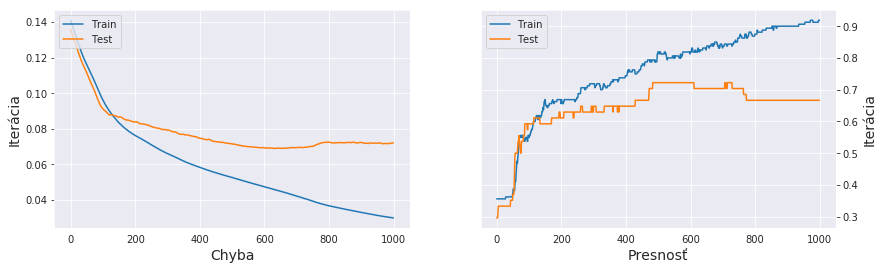

In [91]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Chyba', fontsize=14)
axes[0].set_ylabel('Iterácia', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_xlabel('Presnosť', fontsize=14)
axes[1].set_ylabel('Iterácia', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()